In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm
import pyreadstat as pr

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

%matplotlib inline

In [8]:
arc = 'compensacion-ejecutivos.sav'
df, meta = pr.read_sav(arc)
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [9]:
df.head()

,salario,noasiat,gpa,postgrad,experien
0,99026.0,0.0,3.36,0.0,15.0
1,69190.0,1.0,2.35,1.0,9.0
2,95453.0,1.0,3.33,1.0,10.0
3,57695.0,1.0,3.37,0.0,2.0
4,94364.0,1.0,3.87,1.0,4.0


In [10]:
df.salario.describe() 

count       110.000000
mean      85256.518182
std       16419.359283
min       47279.000000
25%       74379.000000
50%       86384.000000
75%       96827.250000
max      118683.000000
Name: salario, dtype: float64

In [11]:
#Queremos saber cuales son las variables que mas influyen para que una persona gane un salario arriba de $96,000 o 75% 
y =  np.where( df['salario'] > 96000, 1, 0) 
X = df.drop( ['salario'], axis = 1)
y

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

Text(0, 0.5, 'y')

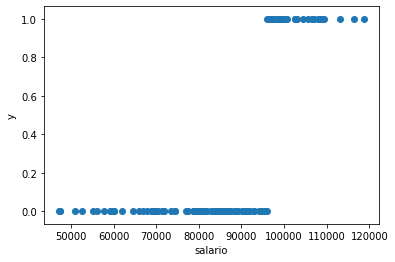

In [9]:
fig, ax = plt.subplots()
ax.scatter( df.salario, y)
ax.set_xlabel('salario')
ax.set_ylabel('y')

In [17]:
reg_log = linear_model.LogisticRegression()
reg_log.fit(X, y)
y_estimado_1 = reg_log.predict_proba(X)[:,1]  #Hacemos esto para traer los resultdos 1s, en probabilidades
y_estimado = reg_log.predict(X)  #Nos regresa 0s o 1s, no probabilidades 

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
y_estimado

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [23]:
y == y_estimado

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False, False, False,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True, False,  True,
       False,  True, False,  True, False,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False])

In [22]:
metrics.accuracy_score(y,reg_log.predict(X))


0.8181818181818182

In [24]:
X.columns

Index(['noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')